<class 'pandas.core.frame.DataFrame'>
RangeIndex: 616 entries, 0 to 615
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SAMPLES  616 non-null    float64
dtypes: float64(1)
memory usage: 4.9 KB


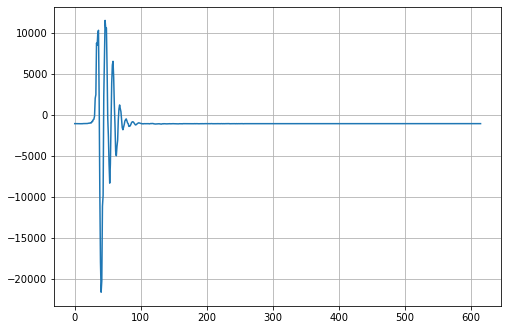

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.signal import butter, lfilter

#Increase size of ploy in jupyter

plt.rcParams["figure.figsize"] = (8,5.5)

if __name__ == "__main__":
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.signal import freqz
    from scipy.fft import fft, fftfreq, ifft
    
    #read *.txt file
    data = pd.read_csv("/home/changwan/GPR_DATA/MOGOD/2020/Channel-1/500/A_SCOPE_GPR.txt", sep = "\t", names=['SAMPLES'],engine='python', encoding = "cp949")
    data.info()
     
    plt.plot(data)
    plt.grid()

0     -1068.0
1     -1068.0
2     -1058.0
3     -1068.0
4     -1066.0
        ...  
611   -1072.0
612   -1076.0
613   -1076.0
614   -1077.0
615   -1069.0
Name: SAMPLES, Length: 616, dtype: float64


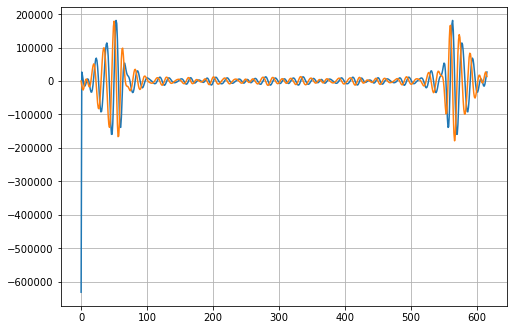

In [3]:
#Increase size of ploy in jupyter
plt.rcParams["figure.figsize"] = (8,5.5)

#data2 = np.c_[data['SAMPLES']]
data2 = pd.DataFrame(data)

samples = data2.size           #sample rate

data2.loc[:,1] = 0
data2
print(data2["SAMPLES"])
t = np.arange(1, samples,1)
#plt.plot(data2)
y=fft(data2["SAMPLES"].values)

plt.plot(y.real)     # fft_real
plt.plot(y.imag)     # fft_real
plt.grid()


[  0.         -26.47848596 -26.71129511 -27.33212757 -28.48354671
 -30.17598401 -32.50680884 -35.61249881 -39.81236865 -42.5740819 ]

[-26.47848596 -26.71129511 -27.33212757 -28.48354671 -30.17598401
 -32.50680884 -35.61249881 -39.81236865 -42.5740819  -38.55951948]


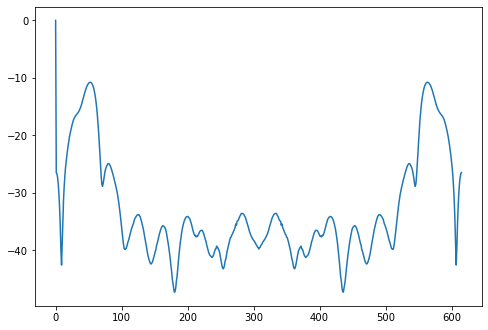

In [4]:
#Increase size of ploy in jupyter
plt.rcParams["figure.figsize"] = (8,5.5)

y_mag = np.abs(y)

#print(max(y_mag))
dB = 10*np.log10( (y_mag)**2 / max(y_mag)**2 ) #decibel
 
plt.plot(dB)
#print(dB)

print(dB[0:10])
print("")
print(np.flipud(dB[samples-10:samples]))

In [37]:
#fft test
#test_r = y.real
#test_i = y.imag
#test = fft(test_r)
#plt.plot(test.real)

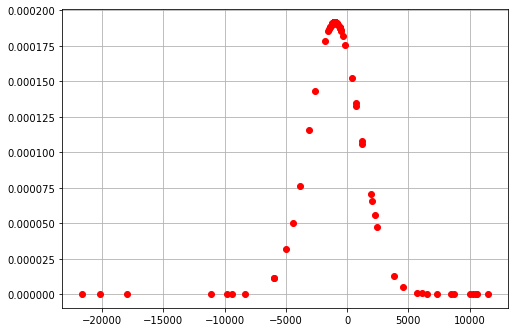

In [5]:
#probability density function
#referred to the page 253 from GPR, IEE
from scipy.stats import norm
data3= data2["SAMPLES"]
m = np.mean(data3)
sd = np.std(data3)

data3_pdf = norm.pdf(data3,m,sd)
#print(data3_pdf)
plt.plot(data3,data3_pdf,"ro")
plt.grid()


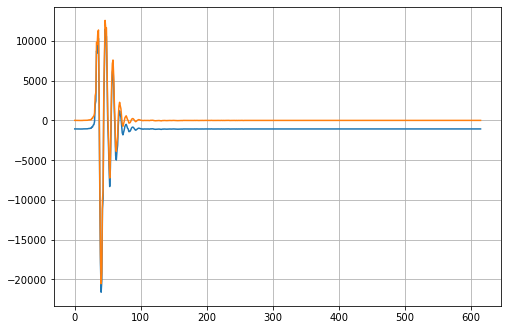

In [6]:
#Increase size of ploy in jupyter
plt.rcParams["figure.figsize"] = (8,5.5)

data4 = data3 - np.mean(data3[500:600])
np.mean(data3[500:600])
plt.plot(data3)
plt.plot(data4)
plt.grid()

46
46


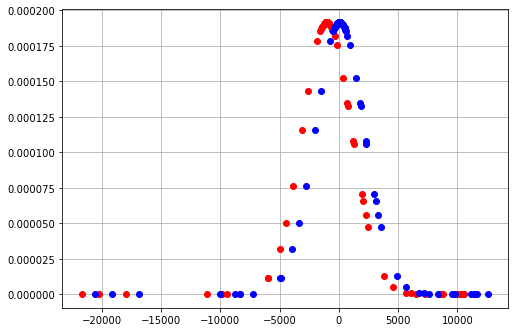

In [7]:
#Increase size of ploy in jupyter
plt.rcParams["figure.figsize"] = (8,5.5)

m2 = np.mean(data4)
sd2 = np.std(data4)
data4_pdf = norm.pdf(data4,m2,sd2)
#data4_pdf = norm.pdf(data4,0,2)

#print(data3_pdf)
plt.plot(data3,data3_pdf,'ro')              #before remove DC_offset
plt.plot(data4,data4_pdf,'bo')              #after remote DC_offset
plt.grid()
print(np.argmax(data3))
print(np.argmax(data4))

#no critical change before and after DC_offset

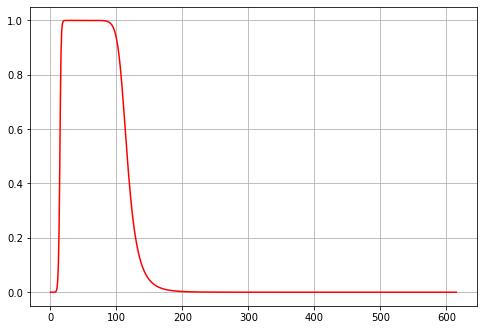

In [17]:
B = np.zeros(shape=(samples,1))
B2 = np.zeros(shape=(samples,1))

#band-pass filter
f_h = 15
f_b = 110
n = 10


for f in range(0,samples,1):
#    B[f] = np.sqrt(1.0/(1.0+( (f/f_h)**(2*n)) )) 
#    B[f] = np.sqrt( ((f/f_b)**(2*n))/(1+(f/f_b)**(2*n)) )
    B[f] = np.sqrt(1.0-(1.0/(1.0+( (f/f_h)**(2*n)) ))) * np.sqrt(1.0-( ((f/f_b)**(2*n))/(1+(f/f_b)**(2*n)) ))
    #     B[f] = (1.0/(1.0+( (f/f_h)**(2*n)) )) * ( ((f/f_b)**(2*n))/(1+(f/f_b)**(2*n)) )
    #    B2[f] = 1-B[f]

B2 = (B + np.flipud(B))

e = 615
s = e-40

#plt.plot(B,"b")                          
#plt.plot(B2,"b")                          
#plt.plot(B2,"y^")    
plt.plot(B,"r") 
#plt.plot(np.flipud(B),"b")
#plt.plot(B2,"ro")                          


#plt.plot(np.flipud(B[e-99:e]),"g^")                          #left-side  high-pass filter

#print (H3[0:99],np.flipud(H3[409:512]))

#plt.plot(H,"bo")
#plt.plot(f_3dB, "r-")
#plt.ylim([0.0,1.5])
plt.grid()


#check the both side of the filter
#print (H3[0:5])
#print ("")
#print (np.flipud(H3[506:511]))

[-15.68101454 -15.70670202 -15.93951116 -16.56034362 -17.71176276
 -19.40420007 -21.73502489 -24.84071486 -29.0405847  -31.80229795
 -27.78773553 -23.46674445 -20.40071917 -18.11550313 -16.31292504
 -14.87453218 -13.73833783 -12.71961406 -11.82922643 -10.99201266
 -10.23541914  -9.50314344  -8.90915124  -8.36743058  -7.85590548
  -7.37566049  -6.95304533  -6.57620135  -6.28584072  -6.06283187
  -5.86545403  -5.7069734   -5.5709636   -5.43566661  -5.28062949
  -5.09081596  -4.86139701  -4.60410287  -4.31414317  -3.98576663
  -3.58114902  -3.1519923   -2.70786575  -2.26498961  -1.84867911
  -1.45332607  -1.10309994  -0.7958745   -0.54145514  -0.33025242
  -0.16908392  -0.06089208]

[-15.93951116 -16.56034362 -17.71176276 -19.40420007 -21.73502489]


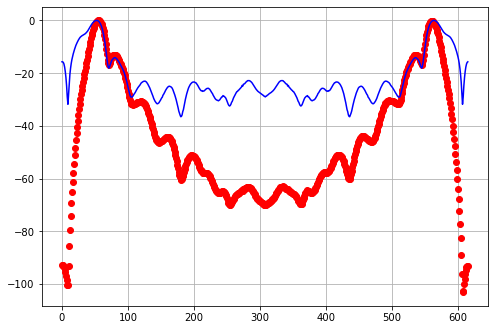

In [46]:
bpf = np.zeros(shape=(samples,1))

y2 = np.fft.fft(data4)
y2_mag = np.abs(y2)

dB2 = 10*np.log10( (y2_mag)**2 / max(y2_mag)**2 ) #decibel
#y_mag[0] = y_mag[samples-1]                #correct strange error in the dB graph at the y_mag[0]
    
for f in range(0,samples,1):
    bpf[f] = B2[f] * y2_mag[f]
#    hpf[f] =  y_mag[f] / H[f]

dB3 = 10*np.log10( (bpf)**2 / max(bpf)**2 ) #decibel

#plt.plot(dB2[100:400],"ro")
#plt.plot(dB[100:400],"b")
plt.plot(dB3,"ro")  #filtered
plt.plot(dB2,"b")

plt.grid()
print (dB2[0:52])
print ("")
print (np.flipud(dB2[e-5:e]))


In [45]:
hpf2_real = np.zeros(shape=(samples,1))
hpf2_imag = np.zeros(shape=(samples,1))
y2 = np.zeros(shape=(samples,1))

for f in range(0,samples,1):
    hpf2_real[f] = H3[f] * y.real[f]
    hpf2_imag[f] = H3[f] * y.imag[f]
    
#plt.plot(hpf2_real, 'b')
#plt.plot(hpf2_imag, 'r')

#y2 = np.fft.ifft(hpf2_real)
#plt.plot(y2.real)
#y2 = np.fft.ifft(hpf2_real[:],hpf2_imag[:])
#print(hpf2_real[:])
#print(hpf2_imag[1])
#plt.plot(y.real)
#plt.plot(hpf2_real)
#plt.grid()
#plt.plot(hpf2_imag) 

y2 = np.fft.ifft(hpf2_real[1],hpf2_imag[f])
plt.plot(y2.real)


ValueError: Invalid number of FFT data points ([6.01601827e-05]) specified.

In [ ]:
#tw = 295.894257 * 10**(-9)   #time window
#fs = samples                 #sample rate                 
#nyq = 0.5 * fs *256          #nyquest frequency
                             #frequency interval
#print(tw)
#print (fs)
#print (nyq)
#lowcut = 500.0
#highcut = 1250.0

#lowcut = 30*10**6
#highcut = 110*10**6

#for order in [1, 5, 10]:
#        b, a = butter_bandpass(lowcut, highcut, fs, order=order)
#        w, h = freqz(b, a, fs=fs, worN=2000)
#        plt.plot(w, abs(h), label="order = %d" % order)
        
#plt.plot([0, 0.5 * fs], [np.sqrt(0.5), np.sqrt(0.5)],
#           '--', label='sqrt(0.5)')
#plt.xlabel('Frequency (Hz)')
#plt.ylabel('Gain')
#plt.grid(True)
#plt.legend(loc='best')

#y = butter_bandpass_filter(data,lowcut, highcut, fs, order=6)
#plt.plot(y)
#plt.grid()
#plt.clf()